To generate a presentation run the following command:

``jupyter nbconvert Lecture_7.ipynb --to slides --post serve``

# How to use this notebook

This notebook serves as both a presentation and interactive environment for students to experiment with Python. If you run it in the interactive mode using [Binder](https://mybinder.org/v2/gh/krzysztofarendt/deap/master), you can modify all code cells. Press `Shift+Enter` to run the modified code.

Link to the repository: https://github.com/krzysztofarendt/deap 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas: split-apply-combine

Let's consider a DataFrame with some random data and two categorical variables *A* and *B*:

In [2]:
# Create a DataFrame with some random data
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df['E'] = 2 * df['C'] - 0.5 * df['D']

df

,A,B,C,D,E
0,foo,one,-1.517226,1.330699,-3.699801
1,bar,one,-0.881338,-0.656916,-1.434218
2,foo,two,0.993313,1.164686,1.404282
3,bar,three,0.149813,-1.084909,0.842081
4,foo,two,0.530789,-0.467458,1.295307
5,bar,two,1.145705,0.865141,1.858839
6,foo,one,1.004777,-0.846974,2.433041
7,foo,three,-0.426038,0.649239,-1.176695


If you have some categorical variables in your DataFrame, you can summarize the results per cattegory using the "split-apply-combine" methodology. The steps are as follows:

* **splitting** the data into groups based on some criteria,
* **applying** a function to each group independently,
* **combining** the results into a data structure.

These steps are highly automated in pandas. Typically you have to construct a command similar to the following:

``df.groupby(some_variable).some_method()``

However, more then one variables can be used to create the groups:

``df.groupby([variable_1, variable_2]).some_method()``

Some of the DataFrame methods most often used with ``.groupby()`` are:

``.mean()``, ``.median()``, ``.sum()``, ``.max()``, ``.min()``, ``.size()``

Examples:

In [3]:
df.groupby(['A']).mean()

,C,D,E
A,,,
bar,0.138060,-0.292228,0.422234
foo,0.117123,0.366038,0.051227


In [4]:
df.groupby(['A', 'B']).mean()

C         D         E
A   B                                  
bar one   -0.881338 -0.656916 -1.434218
    three  0.149813 -1.084909  0.842081
    two    1.145705  0.865141  1.858839
foo one   -0.256225  0.241862 -0.633380
    three -0.426038  0.649239 -1.176695
    two    0.762051  0.348614  1.349794

In [5]:
df.groupby('B').max()

,A,C,D,E
B,,,,
one,foo,1.004777,1.330699,2.433041
three,foo,0.149813,0.649239,0.842081
two,foo,1.145705,1.164686,1.858839


In [6]:
df.groupby('B').sum()

,C,D,E
B,,,
one,-1.393787,-0.173191,-2.700978
three,-0.276224,-0.435670,-0.334614
two,2.669806,1.562369,4.558428


In [7]:
df.groupby('A').describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0  0.138060  1.013572 -0.881338 -0.365762  0.149813  0.647759   
foo   5.0  0.117123  1.083152 -1.517226 -0.426038  0.530789  0.993313   

                  D              ...                            E            \
          max count      mean    ...          75%       max count      mean   
A                                ...                                          
bar  1.145705   3.0 -0.292228    ...     0.104112  0.865141   3.0  0.422234   
foo  1.004777   5.0  0.366038    ...     1.164686  1.330699   5.0  0.051227   

                                                                 
          std       min       25%       50%       75%       max  
A                                                                
bar  1.686197 -1.434218 -0.296068  0.842081  1.350460  1.858839  
foo  2.481408 -3.699801 -1.176695  1.295307  1.404282  2.433041  

[2 rows x 24 columns]

In [8]:
df.groupby(['A', 'B']).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

Learn more: [https://pandas.pydata.org/pandas-docs/stable/groupby.html](https://pandas.pydata.org/pandas-docs/stable/groupby.html)

# Matplotlib plotting styles

Matplotlib supports multiple plotting styles:

In [9]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [10]:
# Let's use seaborn for the rest of this presentation
plt.style.use('seaborn')

# Pandas plotting interface

Pandas provides convenient interface to matplotlib plotting functions. All the following examples can be created using matplotlib alone, but if you have your data in a DataFrame already, it might be easier to use pandas.

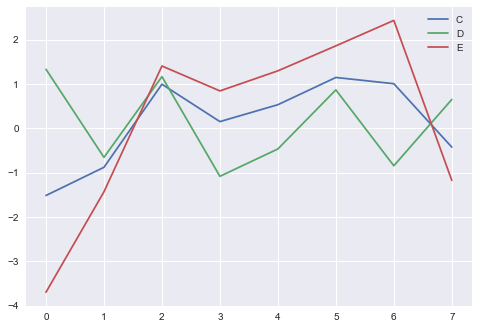

In [11]:
df.plot()
plt.show()

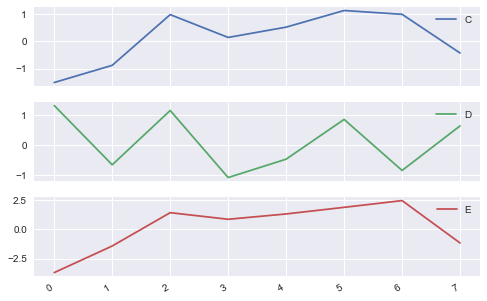

In [12]:
df.plot(subplots=True)
plt.show()

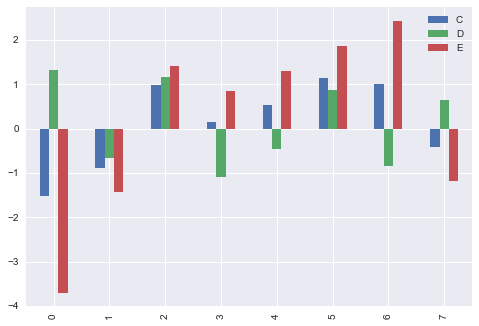

In [13]:
df.plot(kind='bar')
plt.show()

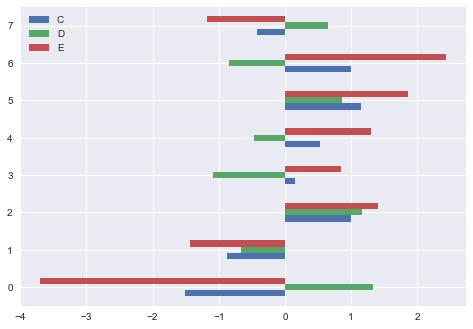

In [14]:
df.plot(kind='barh')
plt.show()

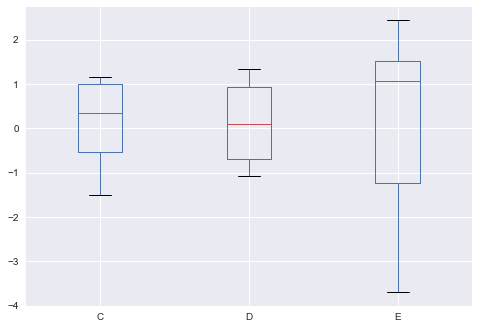

In [15]:
df.plot(kind='box')
plt.show()

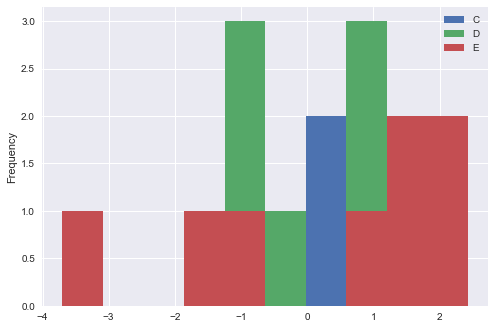

In [16]:
df.plot(kind='hist')
plt.show()

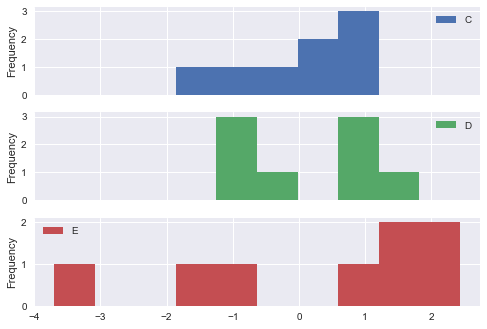

In [17]:
df.plot(kind='hist', subplots=True)
plt.show()

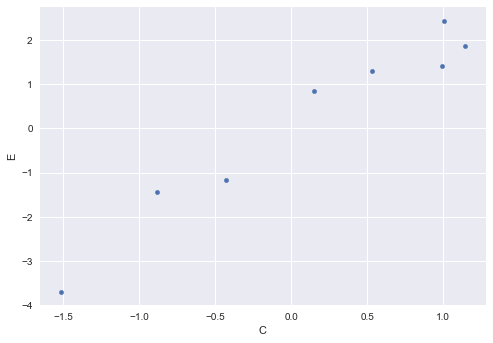

In [84]:
df.plot(kind='scatter', x='C', y='E')
plt.show()

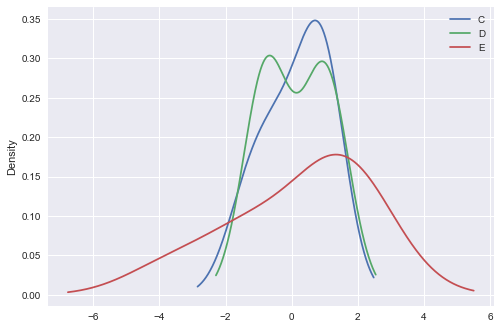

In [19]:
df.plot(kind='density')
plt.show()

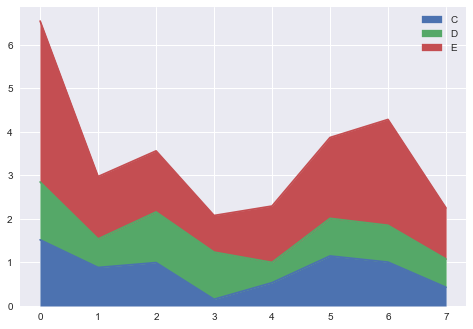

In [59]:
df[['C', 'D', 'E']].abs().plot(kind='area')
plt.show()

* The area plot can be used only with numeric variables, so we chose only C, D, E: ``df[['C', 'D', 'E']]``.
* The area plot requires the numeric values to be positive, so we took the absolute values: ``df.abs()``. 

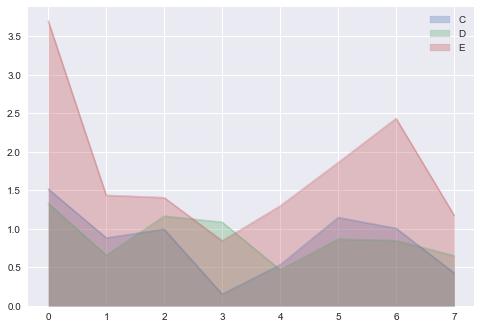

In [68]:
df[['C', 'D', 'E']].abs().plot(kind='area', stacked=False, alpha=0.3, grid=True)
plt.show()

Finally, it's possible to use matplotlib functions together with the plots created in pandas:

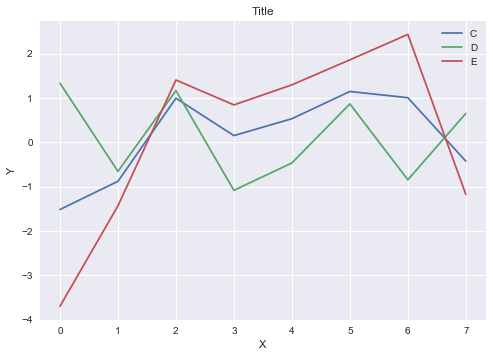

In [71]:
# Pandas
df.plot()  # Create a line plot

# Matplotlib
plt.xlabel("X")     # Add x label
plt.ylabel("Y")     # Add y label
plt.title("Title")  # Add title
plt.show()

Learn more: [https://pandas.pydata.org/pandas-docs/stable/visualization.html](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

# Matplotlib - more advanced examples

### Images

In [47]:
im = plt.imread('gfx/bird.png')  # Native support only for PNG

print(im.shape)

(533, 800, 4)


We see that the image data consists of 4 channels (red, green, blue, alpha), each one containing 533x800 pixels.

Let's print the content of the first channel:

In [48]:
print(im[:, :, 0])

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


It's just a bunch of numbers from 0 to 1. Let's try to see some cross-section of this channel:

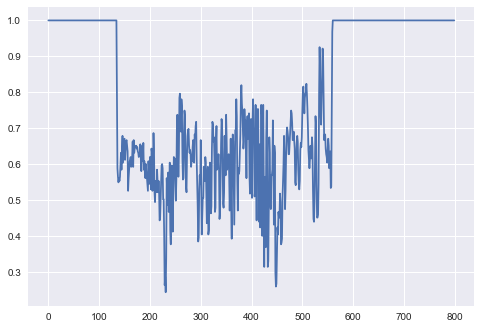

In [55]:
plt.plot(im[250, :, 0])
plt.show()

OK, so what's the actual image?

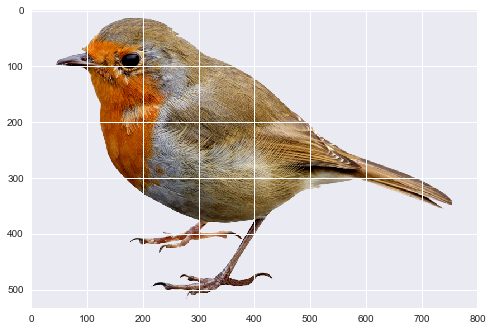

In [50]:
plt.imshow(im)
plt.show()

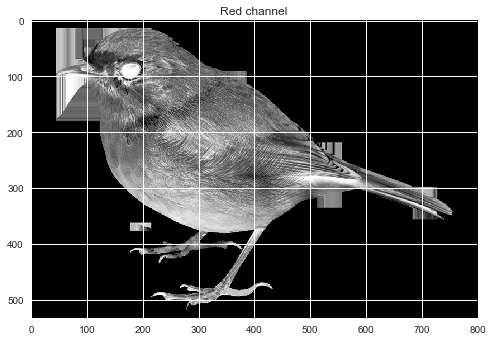

In [51]:
plt.imshow(im[:, :, 0])
plt.title("Red channel")
plt.show()

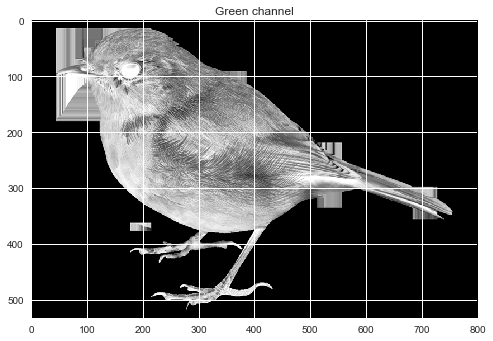

In [52]:
plt.imshow(im[:, :, 1])
plt.title("Green channel")
plt.show()

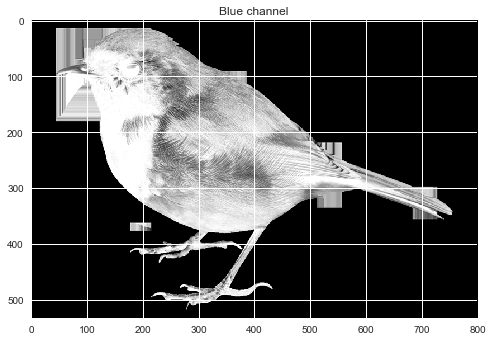

In [53]:
# Blue channel
plt.imshow(im[:, :, 2])
plt.title("Blue channel")
plt.show()

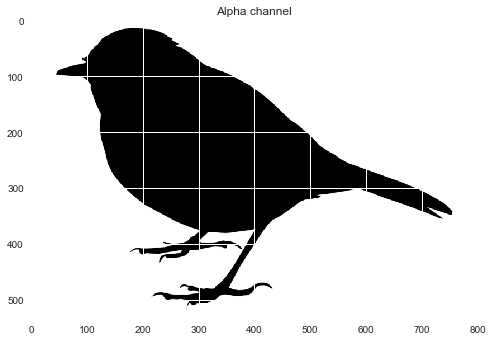

In [54]:
plt.imshow(im[:, :, 3])
plt.title("Alpha channel")
plt.show()

Let's modify the alpha channel to show all pixels in other channels:

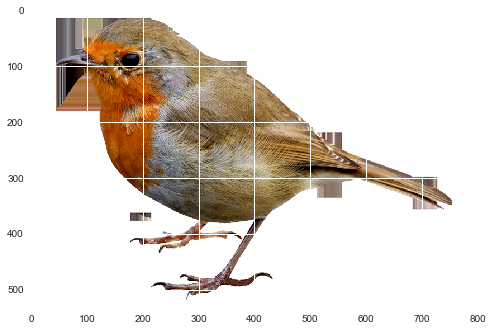

In [30]:
im_all = im.copy()
im_all[:, :, 3] = 1

plt.imshow(im_all)
plt.show()

Doesn't look good. There was a reason for the alpha channel to mask the area around the bird.

Let's play with the color channels instead...

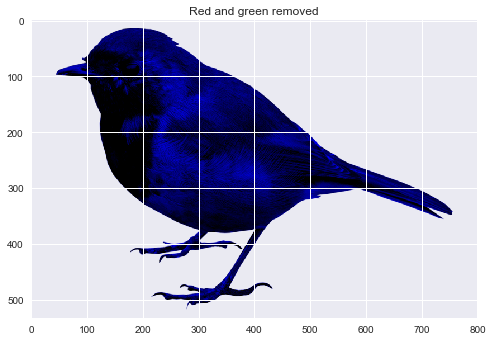

In [31]:
im2 = im.copy()
im2[:, :, 0:2] = 0  # Remove red and green

plt.imshow(im2)
plt.title("Red and green removed")
plt.show()

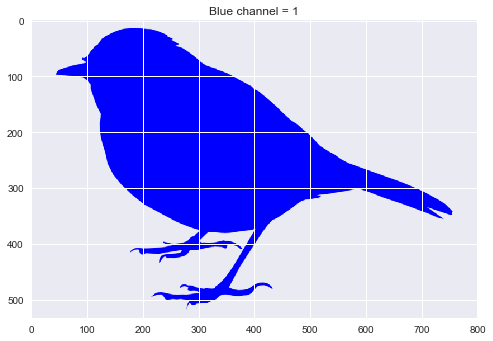

In [32]:
im2[:, :, 2] = 1

plt.imshow(im2)
plt.title("Blue channel = 1")
plt.show()

### Fill between

Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between

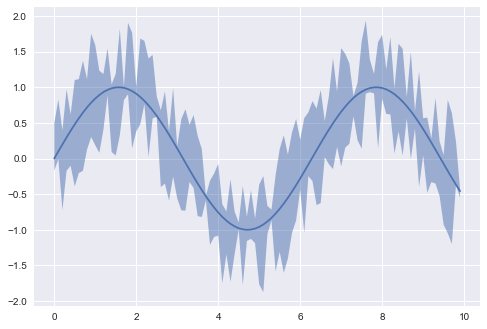

In [37]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
ylo = y - np.random.rand(x.size)
yhi = y + np.random.rand(x.size)

plt.plot(x, y)
plt.fill_between(x, ylo, yhi, alpha = 0.5)
plt.show()

### Annotations

Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate

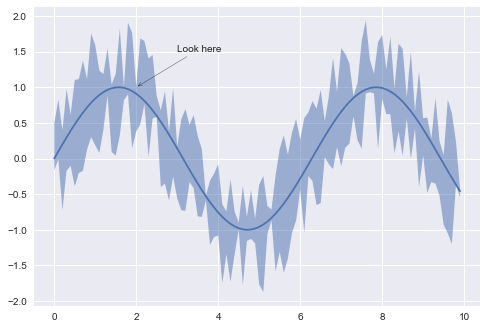

In [46]:
plt.plot(x, y)
plt.fill_between(x, ylo, yhi, alpha = 0.5)
plt.annotate("Look here", xy=(2, 1), xytext=(3, 1.5), arrowprops={'arrowstyle': '->'})
plt.show()